<a href="https://colab.research.google.com/github/NASRTECTH/gradio-crarificaton-image-tang-gunting-pinset-/blob/main/Tim_Nebeng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 9.2 MB/s 
     |████████████████████████████████| 141 kB 57.4 MB/s 
     |████████████████████████████████| 57 kB 5.1 MB/s 
     |████████████████████████████████| 275 kB 43.9 MB/s 
     |████████████████████████████████| 212 kB 44.9 MB/s 
     |████████████████████████████████| 54 kB 3.6 MB/s 
     |████████████████████████████████| 84 kB 4.3 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 2.3 MB 39.7 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 80 kB 12.2 MB/s 
     |████████████████████████████████| 68 kB 7.5 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 856 kB 70.2 MB/s 
     |████████████████████████████████| 62 kB 933

In [ ]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).
/gdrive


In [ ]:
import gradio as gr

In [ ]:
ls

MyDrive/


In [ ]:
cd/gdrive/My Drive/DeepLearning/

/gdrive/My Drive/DeepLearning


In [ ]:
ls

DeepLerning.gunting10/  gunting/  pinset/  tang/


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=50
CHANNELS=3

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/gdrive/My Drive/DeepLearning/",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 312 files belonging to 4 classes.


In [ ]:
class_names = dataset.class_names
class_names

['DeepLerning.gunting10', 'gunting', 'pinset', 'tang']

In [ ]:
len(dataset)

6

In [ ]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[ 24.        18.        20.      ]
  [ 24.        18.        20.      ]
  [ 24.        18.        20.      ]
  ...
  [ 12.         6.         8.      ]
  [ 12.         6.         8.      ]
  [ 12.         6.         8.      ]]

 [[ 23.        17.        19.      ]
  [ 24.964844  18.964844  20.964844]
  [ 26.941406  20.941406  22.941406]
  ...
  [ 12.         6.         8.      ]
  [ 12.         6.         8.      ]
  [ 12.         6.         8.      ]]

 [[ 25.25      19.25      21.25    ]
  [ 26.628906  20.628906  22.628906]
  [ 28.5       22.5       24.5     ]
  ...
  [ 14.25       8.25      10.25    ]
  [ 14.25       8.25      10.25    ]
  [ 14.25       8.25      10.25    ]]

 ...

 [[ 81.13672   88.51172   81.38672 ]
  [ 77.85156   85.22656   78.10156 ]
  [ 75.52734   82.90234   75.77734 ]
  ...
  [109.31641  114.31641  108.31641 ]
  [108.21484  113.21484  107.21484 ]
  [107.125    112.125    106.125   ]]

 [[ 65.98828   72.98828   65.98828 ]
  [ 69.6

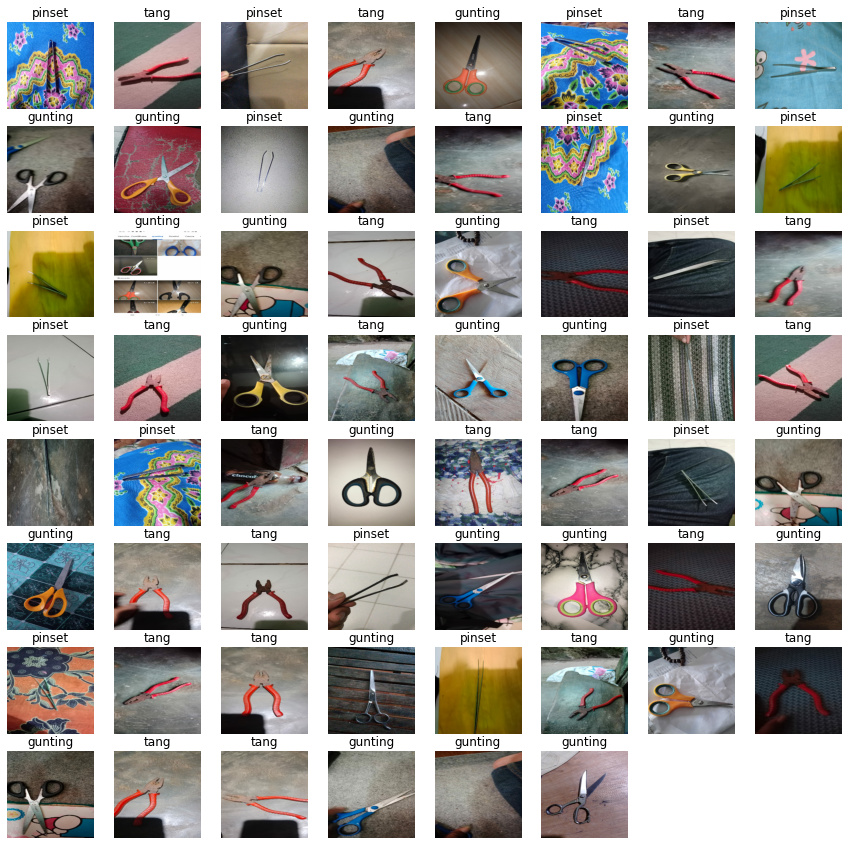

In [ ]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (62, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (62, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (62, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (62, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (62, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (62, 60, 60, 64)         

In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/50
4/4 [==============================] - 30s 5s/step - loss: 2.0410 - accuracy: 0.2500
Epoch 2/50
4/4 [==============================] - 22s 5s/step - loss: 1.5637 - accuracy: 0.3883
Epoch 3/50
4/4 [==============================] - 24s 5s/step - loss: 1.1971 - accuracy: 0.3617
Epoch 4/50
4/4 [==============================] - 23s 5s/step - loss: 1.0921 - accuracy: 0.3989
Epoch 5/50
4/4 [==============================] - 22s 7s/step - loss: 1.0592 - accuracy: 0.4574
Epoch 6/50
4/4 [==============================] - 22s 5s/step - loss: 1.0659 - accuracy: 0.4415
Epoch 7/50
4/4 [==============================] - 23s 5s/step - loss: 0.9888 - accuracy: 0.5479
Epoch 8/50
4/4 [==============================] - 22s 5s/step - loss: 0.9273 - accuracy: 0.5745
Epoch 9/50
4/4 [==============================] - 23s 5s/step - loss: 0.8498 - accuracy: 0.6117
Epoch 10/50
4/4 [==============================] - 23s 7s/step - loss: 0.7687 - accuracy: 0.6649
Epoch 11/50
4/4 [======================

In [ ]:
model.evaluate(test_ds)

2/2 [==============================] - 10s 2s/step - loss: 0.2272 - accuracy: 0.9677


[0.22716426849365234, 0.9677419066429138]

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

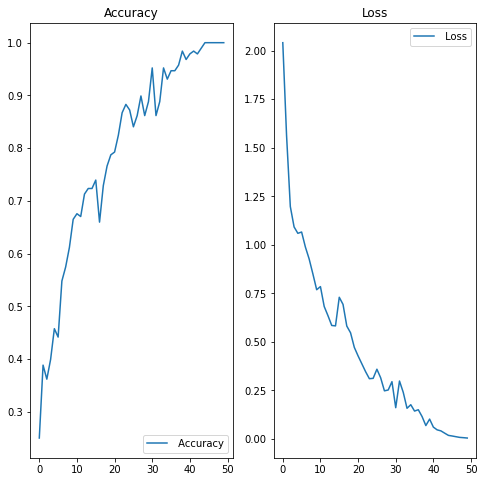

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

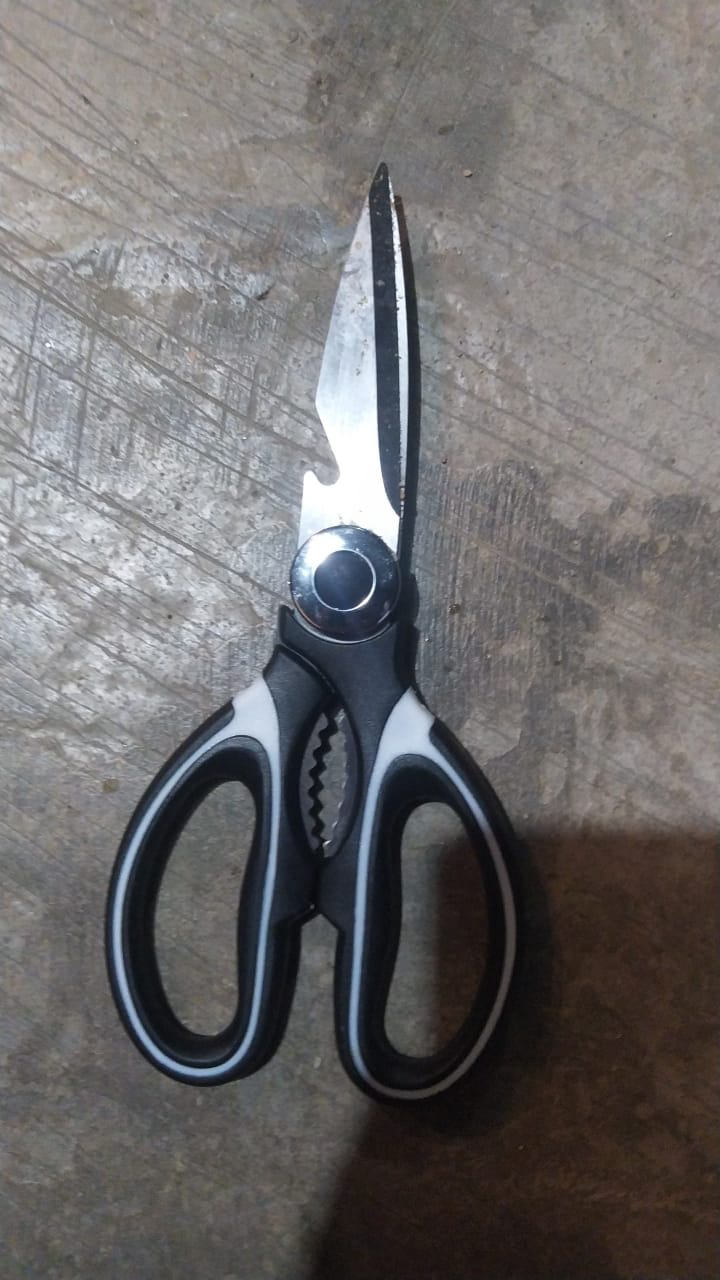

In [ ]:
image_path = "/gdrive/My Drive/DeepLearning/gunting/IMG-20220604-WA0017.jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [ ]:
pred = model.predict(scaled_img)

In [ ]:
output = class_names[np.argmax(pred)]

In [ ]:
output

'gunting'

In [ ]:
model.save("DeepLerning.gunting10")

INFO:tensorflow:Assets written to: DeepLerning.gunting10/assets


In [ ]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(3)}

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)
  
gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://44026.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces
